# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df_data.isna()

Unnamed: 0.1  Unnamed: 0  Organisation  Location   Date  Detail  \
0            False       False         False     False  False   False   
1            False       False         False     False  False   False   
2            False       False         False     False  False   False   
3            False       False         False     False  False   False   
4            False       False         False     False  False   False   
...            ...         ...           ...       ...    ...     ...   
4319         False       False         False     False  False   False   
4320         False       False         False     False  False   False   
4321         False       False         False     False  False   False   
4322         False       False         False     False  False   False   
4323         False       False         False     False  False   False   

      Rocket_Status  Price  Mission_Status  
0             False  False           False  
1             False  False           False  
2             False   True           False  
3             False  False           False  
4             False  False           False  
...             ...    ...             ...  
4319          False   True           False  
4320          False   True           False  
4321          False   True           False  
4322          False   True           False  
4323          False   True           False  

[4324 rows x 9 columns]

In [8]:
df_data.isna().values.any()

True

In [9]:
df_data.sample()

Unnamed: 0.1  Unnamed: 0 Organisation  \
622           622         622  Arianespace   

                                              Location  \
622  ELA-3, Guiana Space Centre, French Guiana, France   

                           Date                              Detail  \
622  Wed Dec 19, 2012 21:49 UTC  Ariane 5 ECA | Skynet 5D, Mexsat-3   

    Rocket_Status  Price Mission_Status  
622  StatusActive  200.0        Success

In [10]:
df_data.sample(5)

Unnamed: 0.1  Unnamed: 0  Organisation  \
3157          3157        3157     RVSN USSR   
3956          3956        3956     RVSN USSR   
3993          3993        3993  US Air Force   
2132          2132        2132     RVSN USSR   
2556          2556        2556     RVSN USSR   

                                        Location                        Date  \
3157      Site 41/1, Plesetsk Cosmodrome, Russia  Thu Apr 05, 1973 11:11 UTC   
3956  Site 31/6, Baikonur Cosmodrome, Kazakhstan  Tue Jul 13, 1965 11:00 UTC   
3993    SLC-20, Cape Canaveral AFS, Florida, USA  Thu Feb 11, 1965 15:19 UTC   
2132      Site 41/1, Plesetsk Cosmodrome, Russia  Tue Jun 11, 1985 14:26 UTC   
2556  Site 31/6, Baikonur Cosmodrome, Kazakhstan            Mon Oct 30, 1978   

                                    Detail  Rocket_Status  Price  \
3157  Molniya-M /Block L | Molniya-2 n†­33  StatusRetired    NaN   
3956              Vostok-2 | Zenit-2 n†­28  StatusRetired    NaN   
3993                    Titan IIIA | LES 1  StatusRetired  63.23   
2132    Molniya-M /Block 2BL | Cosmos 1658  StatusRetired    NaN   
2556  Molniya-M /Block SO-L | Prognoz n†­7  StatusRetired    NaN   

     Mission_Status  
3157        Success  
3956        Failure  
3993        Success  
2132        Success  
2556        Success

In [11]:
# convert date to datetime
date_format = "%a %b %d, %Y"
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True).dt.tz_localize(None)

In [12]:
# convert the prices to numeric
df_data["Price"] = df_data["Price"].str.replace(",", "")

df_data["Price"] = pd.to_numeric(df_data["Price"])

In [13]:
df_data.head()

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location                Date  \
0         LC-39A, Kennedy Space Center, Florida, USA 2020-08-07 05:12:00   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce... 2020-08-06 04:01:00   
2                      Pad A, Boca Chica, Texas, USA 2020-08-04 23:57:00   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan 2020-07-30 21:25:00   
4           SLC-41, Cape Canaveral AFS, Florida, USA 2020-07-30 11:50:00   

                                         Detail Rocket_Status  Price  \
0  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive  50.00   
1           Long March 2D | Gaofen-9 04 & Q-SAT  StatusActive  29.75   
2            Starship Prototype | 150 Meter Hop  StatusActive    NaN   
3  Proton-M/Briz-M | Ekspress-80 & Ekspress-103  StatusActive  65.00   
4                    Atlas V 541 | Perseverance  StatusActive 145.00   

  Mission_Status  
0        Success  
1        Success  
2        Success  
3        Success  
4        Success

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [14]:
clean_df = df_data.dropna()

In [15]:
df_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

In [16]:
df_data.duplicated().any()

True

In [17]:
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [18]:
df_data.drop_duplicates(inplace=True)

In [19]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

## Descriptive Statistics

In [20]:
df_data.describe()

Date    Price
count                           4323   963.00
mean   1987-11-26 22:43:25.981956928   153.92
min              1957-10-04 19:28:00     5.30
25%              1972-04-19 02:57:00    40.00
50%              1984-12-14 20:40:00    62.00
75%              2002-09-08 07:32:00   164.00
max              2020-08-07 05:12:00 5,000.00
std                              NaN   288.57

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   datetime64[ns]
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           963 non-null    float64       
 6   Mission_Status  4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 270.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<Axes: xlabel='Organisation'>

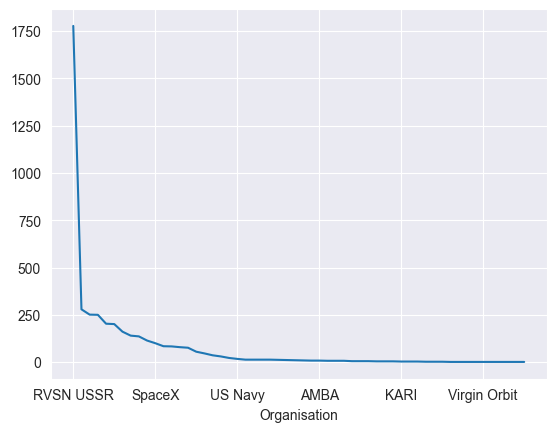

In [22]:
df_data["Organisation"].value_counts().plot()

In [23]:
launches_per_company = df_data["Organisation"].value_counts()
launches_per_company

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

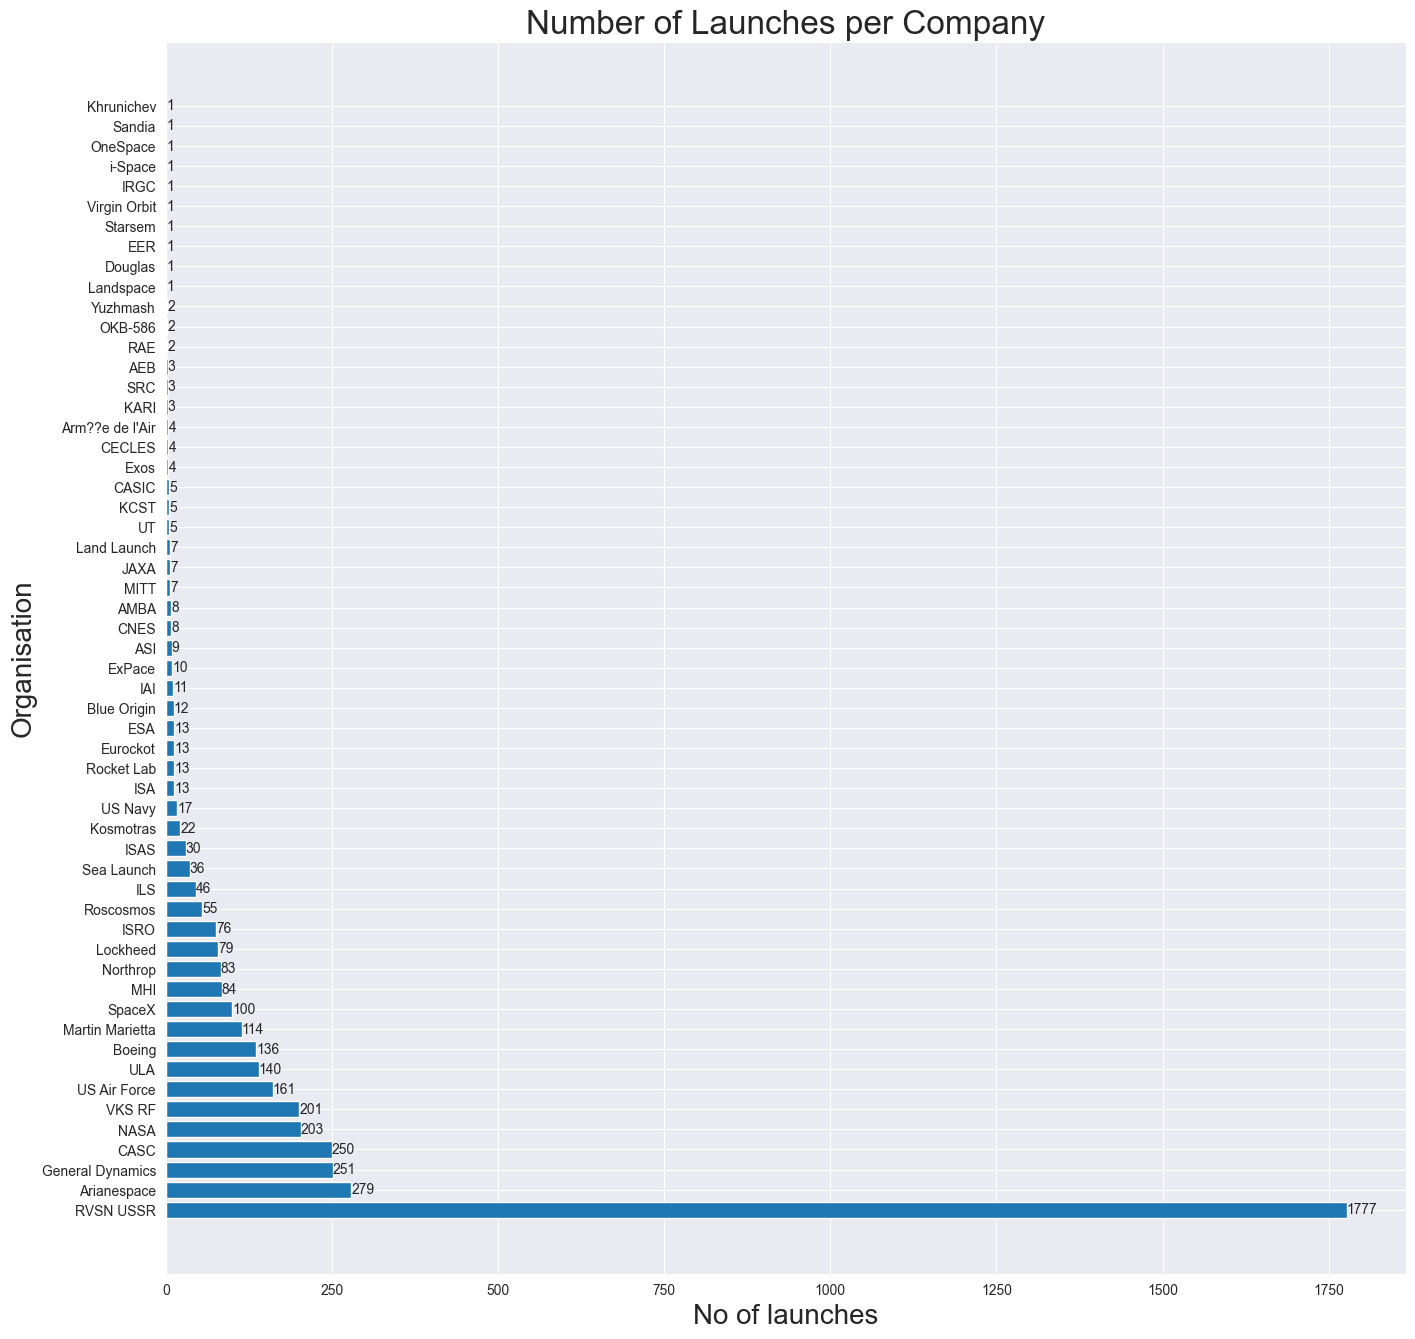

In [24]:
plt.figure(figsize=(16, 16))

plt.xlabel("No of launches", fontsize=20)
plt.ylabel("Organisation", fontsize=20)

plt.title("Number of Launches per Company", fontsize=24)

# Add values inside the bars
for index, value in enumerate(launches_per_company):
    plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.barh(launches_per_company.index.values, launches_per_company.values)

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [25]:
df_data["Rocket_Status"].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

<Axes: ylabel='Rocket_Status'>

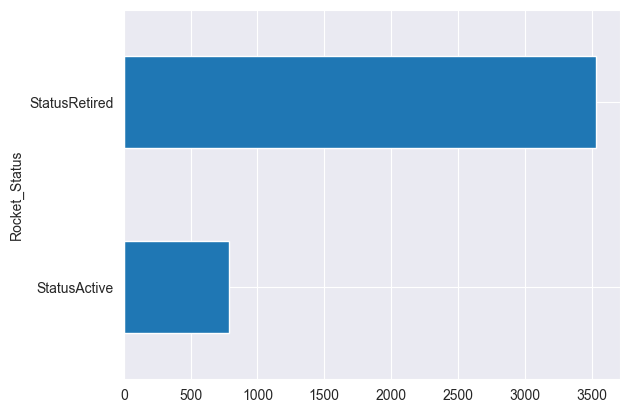

In [26]:
df_data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

In [27]:
rocket_status = df_data["Rocket_Status"].value_counts()
rocket_status

Rocket_Status
StatusRetired    3534
StatusActive      789
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [28]:
df_data["Mission_Status"].value_counts()

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [29]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

Mission_Status
Mission_Status                   
Failure                       339
Partial Failure               102
Prelaunch Failure               4
Success                      3878

In [30]:
distribution_of_mission_status = df_data["Mission_Status"].value_counts()
distribution_of_mission_status

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [31]:
figure = px.pie(df_data, df_data["Mission_Status"], title="Distribution of Mission Status")

figure.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [32]:
prices = df_data["Price"].dropna()

In [33]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10) 

In [34]:
plt.figure(figsize=(16, 9))
sns.histplot(
    data=prices,
    x=prices.values,
    bins=200,
)

plt.title("Prices of Space Flights", fontsize=24)
plt.xlabel("Price in Millions")
plt.ylabel("Number of Space Flights")

# draw ticks for better visualization
major_ticks = [n * 1000 for n in range(6)]
minor_ticks = [n * 100 for n in range(60)]

plt.xticks(major_ticks)
plt.gca().set_xticks(minor_ticks, minor=True)

plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1600x900 with 0 Axes>

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [35]:
df_data["ISO_code"] = df_data["Location"].str.split(", ").str[-1]

In [36]:
country_name_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    # There were are additional places you have to account for
    'Iran' : 'Iran, Islamic Republic of',
    'South Korea' : 'Korea, Republic of',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Pacific Ocean' : 'Kiribati'
}

df_data["ISO_code"] = df_data["ISO_code"].replace(country_name_mapping)

df_data["ISO_code"]

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: ISO_code, Length: 4323, dtype: object

In [37]:
import iso3166
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status    ISO_code Country  
0  StatusActive  50.00        Success         USA     USA  
1  StatusActive  29.75        Success       China     CHN  
2  StatusActive    NaN        Success         USA     USA  
3  StatusActive  65.00        Success  Kazakhstan     RUS  
4  StatusActive 145.00        Success         USA     USA

In [38]:
df_data["ISO_code"] = df_data["ISO_code"].apply(lambda x: countries.get(x).alpha3)

df_data["ISO_code"]

AttributeError: 'NoneType' object has no attribute 'alpha3'

# Use a Choropleth Map to Show the Number of Failures by Country


In [39]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True) 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [40]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

In [41]:
df_burst_chart = df_data.groupby(by=['ISO_code', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail' : pd.Series.count})

In [42]:
burst = px.sunburst(df_burst_chart, 
                    path=['ISO_code', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Sunburst of Countries, Organisation and Mission Status',
                   )
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [43]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status    ISO_code Country  
0  StatusActive  50.00        Success         USA     USA  
1  StatusActive  29.75        Success       China     CHN  
2  StatusActive    NaN        Success         USA     USA  
3  StatusActive  65.00        Success  Kazakhstan     RUS  
4  StatusActive 145.00        Success         USA     USA

In [44]:
# Remove unaccounted prices
df_money_spent_by_org = df_data[["Organisation", "Price"]].dropna()

df_money_spent_by_org = df_money_spent_by_org.groupby(by=['Organisation'], as_index=False).agg({'Price' : pd.Series.sum})

df_money_spent_by_org

Organisation     Price
0       Arianespace 16,345.00
1            Boeing  1,241.00
2              CASC  6,310.51
3               EER     20.00
4               ESA     37.00
5          Eurockot    543.40
6            ExPace     28.30
7               ILS  1,320.00
8              ISRO  2,177.00
9              JAXA    168.00
10        Kosmotras    638.00
11         Lockheed    280.00
12              MHI  3,532.50
13  Martin Marietta    721.40
14             NASA 76,280.00
15         Northrop  3,930.00
16        RVSN USSR 10,000.00
17       Rocket Lab     97.50
18        Roscosmos  1,187.50
19           Sandia     15.00
20           SpaceX  5,444.00
21              ULA 14,798.00
22     US Air Force  1,550.92
23           VKS RF  1,548.90
24     Virgin Orbit     12.00

In [45]:
fig = px.bar(df_money_spent_by_org,
             df_money_spent_by_org["Organisation"],
             df_money_spent_by_org["Price"])

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [46]:
df_money_spent_by_org_per_launch = df_data[["Organisation", "Price"]].dropna()

df_money_spent_by_org_per_launch["No_Of_Launches"] = df_money_spent_by_org_per_launch["Organisation"]

df_money_spent_by_org_per_launch = df_money_spent_by_org_per_launch.groupby(by=['Organisation'], as_index=False).agg({"Price" : pd.Series.sum, "No_Of_Launches" : pd.Series.count})

df_money_spent_by_org_per_launch["Per_Launch"] = df_money_spent_by_org_per_launch["Price"] / df_money_spent_by_org_per_launch["No_Of_Launches"]

In [47]:
df_money_spent_by_org_per_launch

Organisation     Price  No_Of_Launches  Per_Launch
0       Arianespace 16,345.00              96      170.26
1            Boeing  1,241.00               7      177.29
2              CASC  6,310.51             157       40.19
3               EER     20.00               1       20.00
4               ESA     37.00               1       37.00
5          Eurockot    543.40              13       41.80
6            ExPace     28.30               1       28.30
7               ILS  1,320.00              13      101.54
8              ISRO  2,177.00              67       32.49
9              JAXA    168.00               3       56.00
10        Kosmotras    638.00              22       29.00
11         Lockheed    280.00               8       35.00
12              MHI  3,532.50              37       95.47
13  Martin Marietta    721.40               9       80.16
14             NASA 76,280.00             149      511.95
15         Northrop  3,930.00              83       47.35
16        RVSN USSR 10,000.00               2    5,000.00
17       Rocket Lab     97.50              13        7.50
18        Roscosmos  1,187.50              23       51.63
19           Sandia     15.00               1       15.00
20           SpaceX  5,444.00              99       54.99
21              ULA 14,798.00              98      151.00
22     US Air Force  1,550.92              26       59.65
23           VKS RF  1,548.90              33       46.94
24     Virgin Orbit     12.00               1       12.00

In [48]:
fig = px.bar(df_money_spent_by_org_per_launch,
             df_money_spent_by_org_per_launch["Organisation"],
             df_money_spent_by_org_per_launch["Per_Launch"])

fig.update_layout(
    xaxis_title='Organization',
    yaxis_title='Price per Launch'
)

fig.show()

# Chart the Number of Launches per Year

In [49]:
no_of_launches_per_year =  df_data["Date"].dt.year.value_counts().sort_index(ascending=True)

no_of_launches_per_year

Date
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: count, Length: 64, dtype: int64

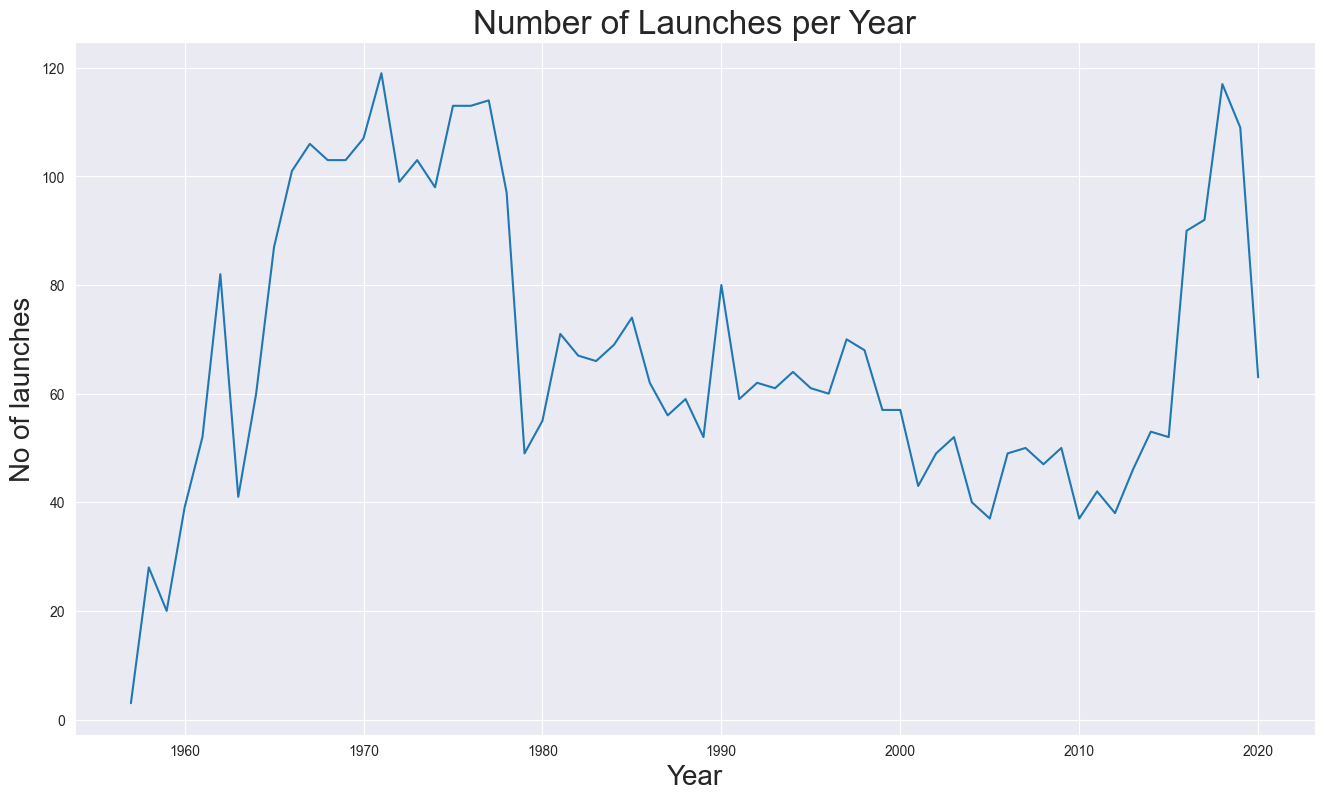

In [50]:
plt.figure(figsize=(16, 9))

plt.xlabel("Year", fontsize=20)
plt.ylabel("No of launches", fontsize=20)

plt.title("Number of Launches per Year", fontsize=24)

# # Add values inside the bars
# for index, value in enumerate(no_of_launches_per_year):
#     plt.text(x=value, y=index, s=value, ha='left', va='center')

plt.plot(no_of_launches_per_year.index, no_of_launches_per_year.values)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [51]:
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month', 
    'count'
]
fig = px.bar(
    ds, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions number by month' 
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [52]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [53]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [54]:
average_launch_price = df_data.dropna()
average_launch_price = average_launch_price.groupby(df_data['Date'].dt.year)['Price'].mean()

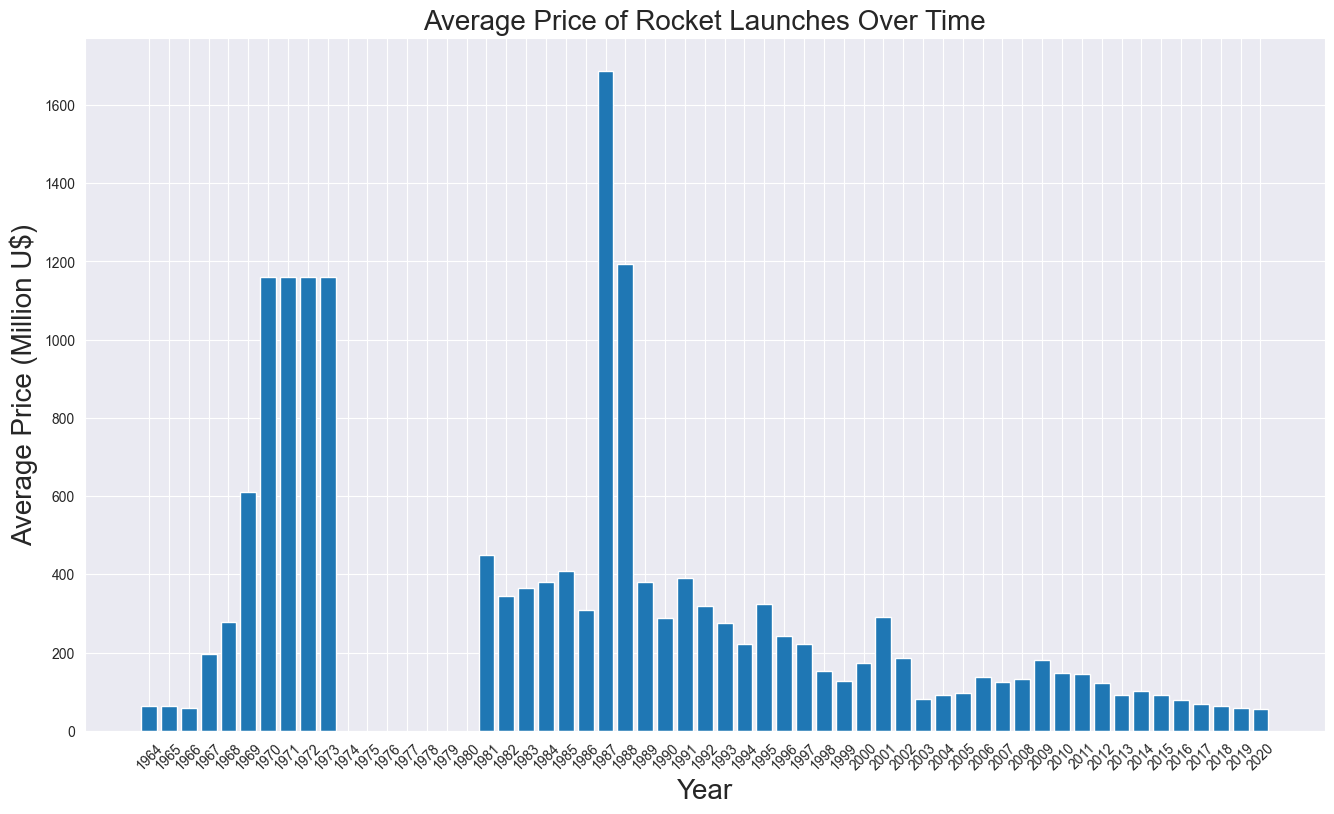

In [55]:
plt.figure(figsize=(16, 9))

plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Price (Million U$)', fontsize=20)
plt.title('Average Price of Rocket Launches Over Time', fontsize=20)

plt.bar(average_launch_price.index, average_launch_price.values)
plt.xticks(range(average_launch_price.index.min(), average_launch_price.index.max()+ 1), rotation=45)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [56]:
org_launches_per_year = df_data.copy()[["Organisation", "Date"]]
org_launches_per_year["Date"] = org_launches_per_year["Date"].dt.year

org_launches_per_year

Organisation  Date
0          SpaceX  2020
1            CASC  2020
2          SpaceX  2020
3       Roscosmos  2020
4             ULA  2020
...           ...   ...
4319      US Navy  1958
4320         AMBA  1958
4321      US Navy  1957
4322    RVSN USSR  1957
4323    RVSN USSR  1957

[4323 rows x 2 columns]

In [57]:
org_launches_per_year = org_launches_per_year.groupby(["Organisation", "Date"]).agg(Total_Launches=("Organisation", "count")).reset_index()

org_launches_per_year

Organisation  Date  Total_Launches
0             AEB  1997               1
1             AEB  1999               1
2             AEB  2003               1
3            AMBA  1958               7
4            AMBA  1967               1
..            ...   ...             ...
658        VKS RF  2020               3
659  Virgin Orbit  2020               1
660      Yuzhmash  1969               1
661      Yuzhmash  1991               1
662       i-Space  2019               1

[663 rows x 3 columns]

In [58]:
top_10_orgs = org_launches_per_year.groupby("Organisation").agg({"Total_Launches" : pd.Series.count}).sort_values("Total_Launches", ascending=False).head(10).reset_index()

top_10_orgs

Organisation  Total_Launches
0              CASC              47
1              NASA              46
2               MHI              42
3         RVSN USSR              39
4       Arianespace              37
5  General Dynamics              37
6              ISRO              31
7   Martin Marietta              30
8          Northrop              29
9            VKS RF              29

In [59]:
org_launches_per_year = org_launches_per_year.query("Organisation in @top_10_orgs['Organisation']")

org_launches_per_year

Organisation  Date  Total_Launches
12   Arianespace  1984               3
13   Arianespace  1985               4
14   Arianespace  1986               3
15   Arianespace  1987               2
16   Arianespace  1988               6
..           ...   ...             ...
654       VKS RF  2016               4
655       VKS RF  2017               6
656       VKS RF  2018               5
657       VKS RF  2019               8
658       VKS RF  2020               3

[367 rows x 3 columns]

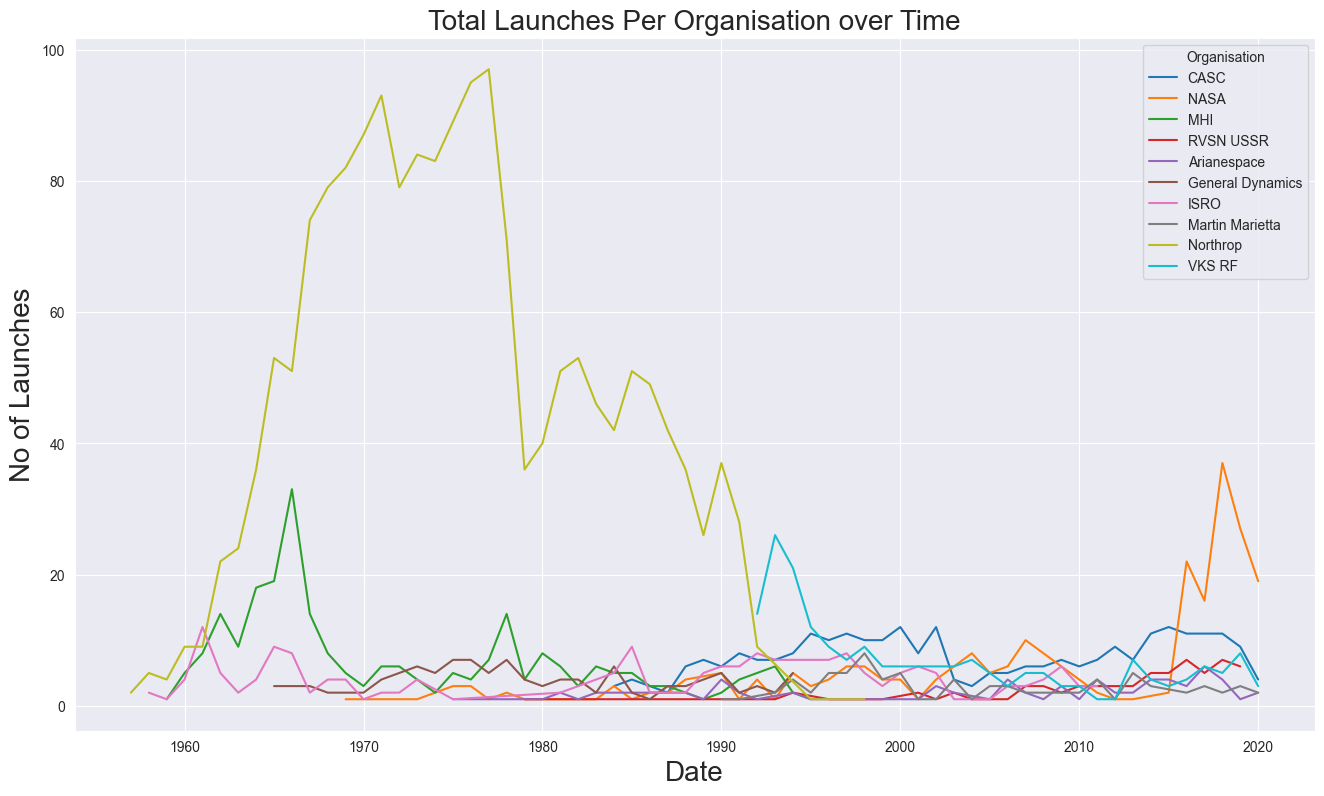

In [60]:
plt.figure(figsize=(16, 9))

plt.title('Total Launches Per Organisation over Time', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    plt.plot(org_data['Date'], org_data['Total_Launches'])

plt.legend(top_10_orgs["Organisation"], title='Organisation')

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [61]:
df_data["ISO_code"].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran, Islamic Republic of', 'France',
       'India', "Korea, Democratic People's Republic of", 'Kiribati',
       'Korea, Republic of', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [62]:
df_USA = df_data.query("ISO_code == 'USA' and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)

df_USA

Organisation                                    Location  \
4321           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4319           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4318              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4317           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
...                ...                                         ...   
1732              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1726   Martin Marietta     SLC-4E, Vandenberg AFB, California, USA   
1724              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1722  General Dynamics     SLC-3W, Vandenberg AFB, California, USA   
1721  General Dynamics   SLC-36B, Cape Canaveral AFS, Florida, USA   

                    Date                              Detail  Rocket_Status  \
4321 1957-12-06 16:44:00             Vanguard | Vanguard TV3  StatusRetired   
4320 1958-02-01 03:48:00                 Juno I | Explorer 1  StatusRetired   
4319 1958-02-05 07:33:00           Vanguard | Vanguard TV3BU  StatusRetired   
4318 1958-03-05 18:27:00                 Juno I | Explorer 2  StatusRetired   
4317 1958-03-17 12:15:00               Vanguard | Vanguard 1  StatusRetired   
...                  ...                                 ...            ...   
1732 1991-09-12 23:11:00    Space Shuttle Discovery | STS-48  StatusRetired   
1726 1991-11-08 07:07:00   Titan IV(403)A | SLDCOM & NOSS 3x  StatusRetired   
1724 1991-11-24 23:44:00     Space Shuttle Atlantis | STS-44  StatusRetired   
1722 1991-11-28 13:23:00  Atlas-E/F Star-37S-ISS | DMSP F-11  StatusRetired   
1721 1991-12-07 22:47:00             Atlas II | Eutelsat 2F3  StatusRetired   

      Price Mission_Status ISO_code Country                date  month  
4321    NaN        Failure      USA     USA 1957-12-06 16:44:00     12  
4320    NaN        Success      USA     USA 1958-02-01 03:48:00      2  
4319    NaN        Failure      USA     USA 1958-02-05 07:33:00      2  
4318    NaN        Failure      USA     USA 1958-03-05 18:27:00      3  
4317    NaN        Success      USA     USA 1958-03-17 12:15:00      3  
...     ...            ...      ...     ...                 ...    ...  
1732 450.00        Success      USA     USA 1991-09-12 23:11:00      9  
1726    NaN        Success      USA     USA 1991-11-08 07:07:00     11  
1724 450.00        Success      USA     USA 1991-11-24 23:44:00     11  
1722    NaN        Success      USA     USA 1991-11-28 13:23:00     11  
1721    NaN        Success      USA     USA 1991-12-07 22:47:00     12  

[662 rows x 11 columns]

In [63]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]

In [64]:
cold_war_years = Or_df.sort_values("Date")

cold_war_years[(cold_war_years.Date <= "1991-01-01 00:0000")]

Organisation                                     Location  \
4323         RVSN USSR    Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322         RVSN USSR    Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321           US Navy     LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA     LC-26A, Cape Canaveral AFS, Florida, USA   
4319           US Navy     LC-18A, Cape Canaveral AFS, Florida, USA   
...                ...                                          ...   
1780  General Dynamics      SLC-3W, Vandenberg AFB, California, USA   
1779              NASA   LC-39B, Kennedy Space Center, Florida, USA   
1778         RVSN USSR  Site 90/20, Baikonur Cosmodrome, Kazakhstan   
1777         RVSN USSR      Site 133/3, Plesetsk Cosmodrome, Russia   
1776         RVSN USSR       Site 32/2, Plesetsk Cosmodrome, Russia   

                    Date                              Detail  Rocket_Status  \
4323 1957-10-04 19:28:00          Sputnik 8K71PS | Sputnik-1  StatusRetired   
4322 1957-11-03 02:30:00          Sputnik 8K71PS | Sputnik-2  StatusRetired   
4321 1957-12-06 16:44:00             Vanguard | Vanguard TV3  StatusRetired   
4320 1958-02-01 03:48:00                 Juno I | Explorer 1  StatusRetired   
4319 1958-02-05 07:33:00           Vanguard | Vanguard TV3BU  StatusRetired   
...                  ...                                 ...            ...   
1780 1990-12-01 15:57:00  Atlas-E/F Star-37S-ISS | DMSP F-10  StatusRetired   
1779 1990-12-02 06:49:00     Space Shuttle Columbia | STS-35  StatusRetired   
1778 1990-12-04 00:48:00             Tsyklon-2 | Cosmos 2107  StatusRetired   
1777 1990-12-10 07:54:00    Cosmos-3M (11K65M) | Cosmos 2112  StatusRetired   
1776 1990-12-22 07:28:00     Tsyklon-3 | Cosmos 2114 to 2119  StatusRetired   

      Price Mission_Status            ISO_code Country                date  \
4323    NaN        Success          Kazakhstan     RUS 1957-10-04 19:28:00   
4322    NaN        Success          Kazakhstan     RUS 1957-11-03 02:30:00   
4321    NaN        Failure                 USA     USA 1957-12-06 16:44:00   
4320    NaN        Success                 USA     USA 1958-02-01 03:48:00   
4319    NaN        Failure                 USA     USA 1958-02-05 07:33:00   
...     ...            ...                 ...     ...                 ...   
1780    NaN        Success                 USA     USA 1990-12-01 15:57:00   
1779 450.00        Success                 USA     USA 1990-12-02 06:49:00   
1778    NaN        Success          Kazakhstan     RUS 1990-12-04 00:48:00   
1777    NaN        Success  Russian Federation     RUS 1990-12-10 07:54:00   
1776    NaN        Success  Russian Federation     RUS 1990-12-22 07:28:00   

      month  
4323     10  
4322     11  
4321     12  
4320      2  
4319      2  
...     ...  
1780     12  
1779     12  
1778     12  
1777     12  
1776     12  

[2385 rows x 11 columns]

In [65]:
df_USSR = df_data.query("(ISO_code == 'Russian Federation' or ISO_code == 'Kazakhstan') and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)
df_USSR["ISO_code"] = "SUN"

df_USSR

Organisation                                      Location  \
4323    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4315    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4313    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4301    RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
...           ...                                           ...   
1728    RVSN USSR       Site 132/1, Plesetsk Cosmodrome, Russia   
1725    RVSN USSR        Site 32/1, Plesetsk Cosmodrome, Russia   
1723    RVSN USSR       Site 133/3, Plesetsk Cosmodrome, Russia   
1719     Yuzhmash        Site 32/2, Plesetsk Cosmodrome, Russia   
1718    RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   

                    Date                                 Detail  \
4323 1957-10-04 19:28:00             Sputnik 8K71PS | Sputnik-1   
4322 1957-11-03 02:30:00             Sputnik 8K71PS | Sputnik-2   
4315 1958-04-27 09:01:00            Sputnik 8A91 | Sputnik-3 #1   
4313 1958-05-15 07:12:00            Sputnik 8A91 | Sputnik-3 #2   
4301 1958-09-23 07:40:00             Vostok | E-1 n†­1 (Luna-1)   
...                  ...                                    ...   
1728 1991-10-10 14:00:00       Cosmos-3M (11K65M) | Cosmos 2164   
1725 1991-11-12 20:09:00        Tsyklon-3 | Cosmos 2165 to 2170   
1723 1991-11-27 03:30:00       Cosmos-3M (11K65M) | Cosmos 2173   
1719 1991-12-18 03:54:00  Tsyklon-3 | Intercosmos 25 & Magion 3   
1718 1991-12-20 00:00:00         Rokot/Briz K | GVM Demo Flight   

      Rocket_Status  Price Mission_Status ISO_code Country  \
4323  StatusRetired    NaN        Success      SUN     RUS   
4322  StatusRetired    NaN        Success      SUN     RUS   
4315  StatusRetired    NaN        Failure      SUN     RUS   
4313  StatusRetired    NaN        Success      SUN     RUS   
4301  StatusRetired    NaN        Failure      SUN     RUS   
...             ...    ...            ...      ...     ...   
1728  StatusRetired    NaN        Success      SUN     RUS   
1725  StatusRetired    NaN        Success      SUN     RUS   
1723  StatusRetired    NaN        Success      SUN     RUS   
1719  StatusRetired    NaN        Success      SUN     RUS   
1718  StatusRetired    NaN        Success      SUN     RUS   

                    date  month  
4323 1957-10-04 19:28:00     10  
4322 1957-11-03 02:30:00     11  
4315 1958-04-27 09:01:00      4  
4313 1958-05-15 07:12:00      5  
4301 1958-09-23 07:40:00      9  
...                  ...    ...  
1728 1991-10-10 14:00:00     10  
1725 1991-11-12 20:09:00     11  
1723 1991-11-27 03:30:00     11  
1719 1991-12-18 03:54:00     12  
1718 1991-12-20 00:00:00     12  

[1770 rows x 11 columns]

In [66]:
df_cold_war = pd.concat([df_USA, df_USSR]).sort_values("Date", ascending=True)

df_cold_war

Organisation                                      Location  \
4323         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322         RVSN USSR     Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA      LC-26A, Cape Canaveral AFS, Florida, USA   
4319           US Navy      LC-18A, Cape Canaveral AFS, Florida, USA   
...                ...                                           ...   
1723         RVSN USSR       Site 133/3, Plesetsk Cosmodrome, Russia   
1722  General Dynamics       SLC-3W, Vandenberg AFB, California, USA   
1721  General Dynamics     SLC-36B, Cape Canaveral AFS, Florida, USA   
1719          Yuzhmash        Site 32/2, Plesetsk Cosmodrome, Russia   
1718         RVSN USSR  Site 175/58, Baikonur Cosmodrome, Kazakhstan   

                    Date                                 Detail  \
4323 1957-10-04 19:28:00             Sputnik 8K71PS | Sputnik-1   
4322 1957-11-03 02:30:00             Sputnik 8K71PS | Sputnik-2   
4321 1957-12-06 16:44:00                Vanguard | Vanguard TV3   
4320 1958-02-01 03:48:00                    Juno I | Explorer 1   
4319 1958-02-05 07:33:00              Vanguard | Vanguard TV3BU   
...                  ...                                    ...   
1723 1991-11-27 03:30:00       Cosmos-3M (11K65M) | Cosmos 2173   
1722 1991-11-28 13:23:00     Atlas-E/F Star-37S-ISS | DMSP F-11   
1721 1991-12-07 22:47:00                Atlas II | Eutelsat 2F3   
1719 1991-12-18 03:54:00  Tsyklon-3 | Intercosmos 25 & Magion 3   
1718 1991-12-20 00:00:00         Rokot/Briz K | GVM Demo Flight   

      Rocket_Status  Price Mission_Status ISO_code Country  \
4323  StatusRetired    NaN        Success      SUN     RUS   
4322  StatusRetired    NaN        Success      SUN     RUS   
4321  StatusRetired    NaN        Failure      USA     USA   
4320  StatusRetired    NaN        Success      USA     USA   
4319  StatusRetired    NaN        Failure      USA     USA   
...             ...    ...            ...      ...     ...   
1723  StatusRetired    NaN        Success      SUN     RUS   
1722  StatusRetired    NaN        Success      USA     USA   
1721  StatusRetired    NaN        Success      USA     USA   
1719  StatusRetired    NaN        Success      SUN     RUS   
1718  StatusRetired    NaN        Success      SUN     RUS   

                    date  month  
4323 1957-10-04 19:28:00     10  
4322 1957-11-03 02:30:00     11  
4321 1957-12-06 16:44:00     12  
4320 1958-02-01 03:48:00      2  
4319 1958-02-05 07:33:00      2  
...                  ...    ...  
1723 1991-11-27 03:30:00     11  
1722 1991-11-28 13:23:00     11  
1721 1991-12-07 22:47:00     12  
1719 1991-12-18 03:54:00     12  
1718 1991-12-20 00:00:00     12  

[2432 rows x 11 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [67]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
Or_df.head()

Organisation                                      Location  \
0       SpaceX    LC-39A, Kennedy Space Center, Florida, USA   
2       SpaceX                 Pad A, Boca Chica, Texas, USA   
3    Roscosmos  Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA      SLC-41, Cape Canaveral AFS, Florida, USA   
6    Roscosmos    Site 31/6, Baikonur Cosmodrome, Kazakhstan   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
6 2020-07-23 14:26:00                   Soyuz 2.1a | Progress MS-15   

  Rocket_Status  Price Mission_Status    ISO_code Country                date  \
0  StatusActive  50.00        Success         USA     USA 2020-08-07 05:12:00   
2  StatusActive    NaN        Success         USA     USA 2020-08-04 23:57:00   
3  StatusActive  65.00        Success  Kazakhstan     RUS 2020-07-30 21:25:00   
4  StatusActive 145.00        Success         USA     USA 2020-07-30 11:50:00   
6  StatusActive  48.50        Success  Kazakhstan     RUS 2020-07-23 14:26:00   

   month  
0      8  
2      8  
3      7  
4      7  
6      7

In [68]:
launches = Or_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

Country  counts
0     RUS    2099
1     USA    1351

([<matplotlib.patches.Wedge at 0x21c42b7b610>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

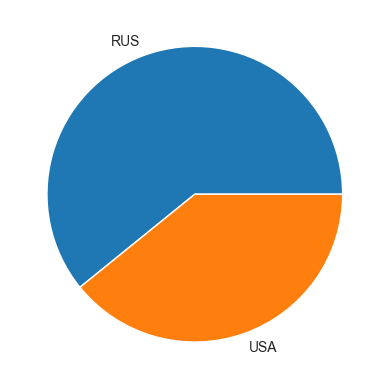

In [69]:
colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

In [70]:
cold_war_no_of_launches = df_cold_war.value_counts("ISO_code")

cold_war_no_of_launches

ISO_code
SUN    1770
USA     662
Name: count, dtype: int64

In [71]:
figure = px.pie(names=cold_war_no_of_launches.index, values=cold_war_no_of_launches.values, title="No of Launches of the USA and USSR during the Cold War")

figure.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [72]:
launches_by_superpowers = df_cold_war.copy()[["Date", "ISO_code"]]
launches_by_superpowers["Date"] = launches_by_superpowers["Date"].dt.year

launches_by_superpowers

Date ISO_code
4323  1957      SUN
4322  1957      SUN
4321  1957      USA
4320  1958      USA
4319  1958      USA
...    ...      ...
1723  1991      SUN
1722  1991      USA
1721  1991      USA
1719  1991      SUN
1718  1991      SUN

[2432 rows x 2 columns]

In [73]:
launches_by_superpowers = launches_by_superpowers.groupby(["Date", "ISO_code"]).agg(Total_Launches=('Date', 'count')).reset_index()

launches_by_superpowers

Date ISO_code  Total_Launches
0   1957      SUN               2
1   1957      USA               1
2   1958      SUN               5
3   1958      USA              23
4   1959      SUN               4
..   ...      ...             ...
65  1989      USA              16
66  1990      SUN              37
67  1990      USA              26
68  1991      SUN              29
69  1991      USA              18

[70 rows x 3 columns]

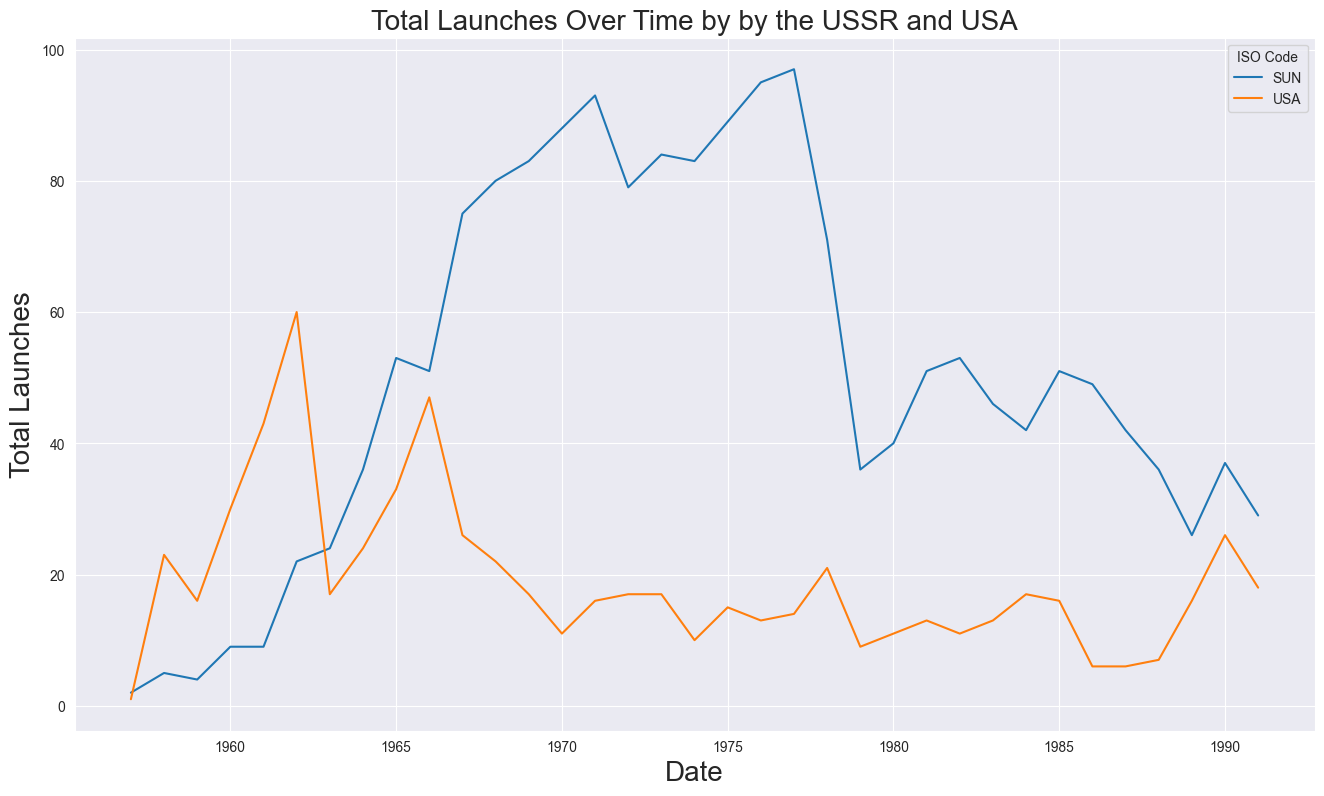

In [74]:
plt.figure(figsize=(16, 9))

plt.title('Total Launches Over Time by by the USSR and USA', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Launches', fontsize=20)

for iso_code in launches_by_superpowers['ISO_code'].unique():
    iso_data = launches_by_superpowers[launches_by_superpowers['ISO_code'] == iso_code]
    plt.plot(iso_data['Date'], iso_data['Total_Launches'])

plt.legend(launches_by_superpowers["ISO_code"].unique(), title='ISO Code')

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [75]:
total_missions_per_year = df_data.copy()[["Date", "Mission_Status"]]

total_missions_per_year["Date"] = total_missions_per_year["Date"].dt.year

total_missions_per_year = total_missions_per_year.groupby("Date").agg(Total_Launches=('Date', 'count')).reset_index()

total_missions_per_year

Date  Total_Launches
0   1957               3
1   1958              28
2   1959              20
3   1960              39
4   1961              52
..   ...             ...
59  2016              90
60  2017              92
61  2018             117
62  2019             109
63  2020              63

[64 rows x 2 columns]

In [76]:
failures_per_year = df_data.copy()[["Date", "Mission_Status"]].query("Mission_Status == 'Failure'")

failures_per_year["Date"] = failures_per_year["Date"].dt.year

failures_per_year = failures_per_year.groupby("Date").agg(Failures=('Date', 'count')).reset_index()

failures_per_year

Date  Failures
0   1957         1
1   1958        20
2   1959         9
3   1960        20
4   1961        17
..   ...       ...
59  2016         2
60  2017         6
61  2018         2
62  2019         6
63  2020         6

[64 rows x 2 columns]

In [77]:
df_failures = pd.merge(total_missions_per_year, failures_per_year, on="Date")

df_failures

Date  Total_Launches  Failures
0   1957               3         1
1   1958              28        20
2   1959              20         9
3   1960              39        20
4   1961              52        17
..   ...             ...       ...
59  2016              90         2
60  2017              92         6
61  2018             117         2
62  2019             109         6
63  2020              63         6

[64 rows x 3 columns]

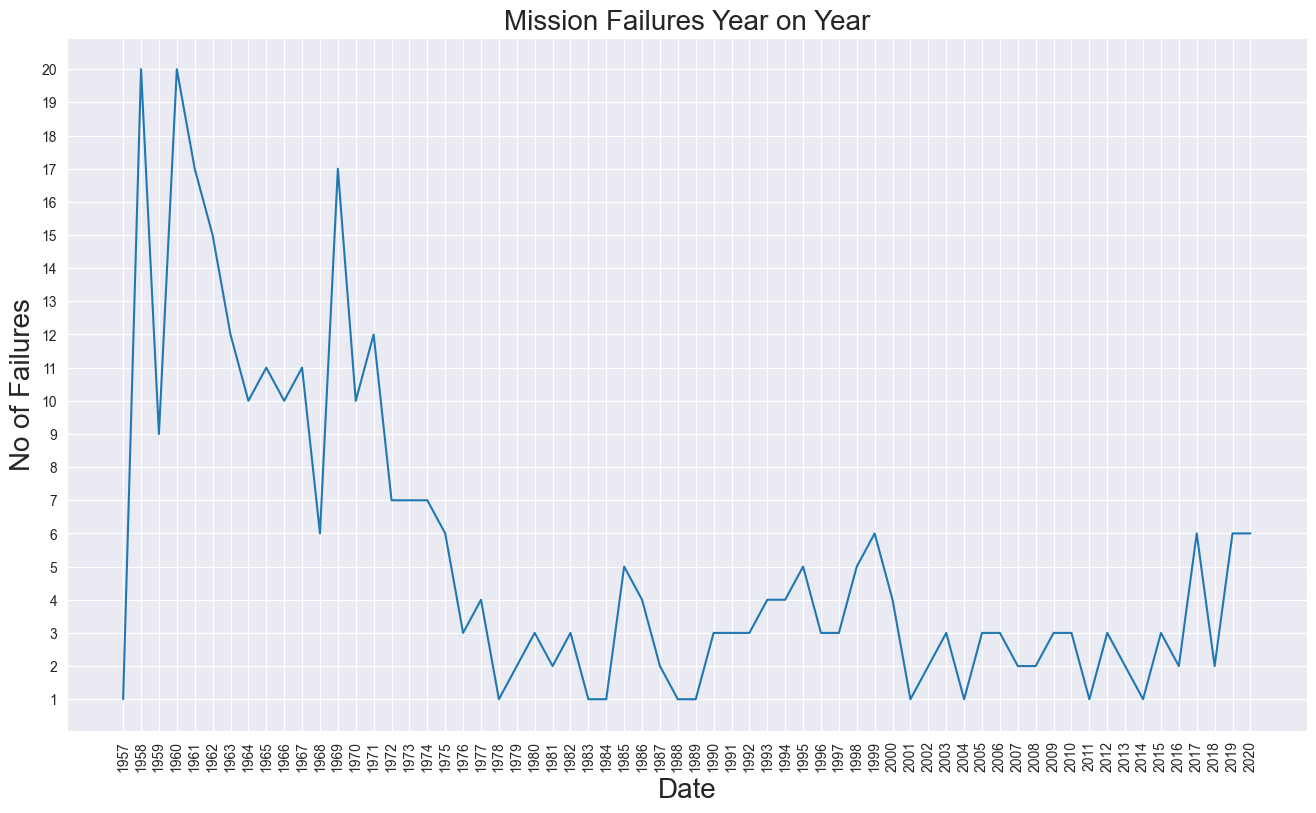

In [78]:
plt.figure(figsize=(16, 9))

plt.title('Mission Failures Year on Year', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Failures', fontsize=20)
plt.yticks(range(0, 21))
plt.xticks(df_failures["Date"], rotation=90)

plt.plot(df_failures["Date"], df_failures["Failures"])

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [79]:
df_failures["Failures_Percent"] = df_failures["Failures"] / df_failures["Total_Launches"]

df_failures["Failures_Percent"]

0    0.33
1    0.71
2    0.45
3    0.51
4    0.33
     ... 
59   0.02
60   0.07
61   0.02
62   0.06
63   0.10
Name: Failures_Percent, Length: 64, dtype: float64

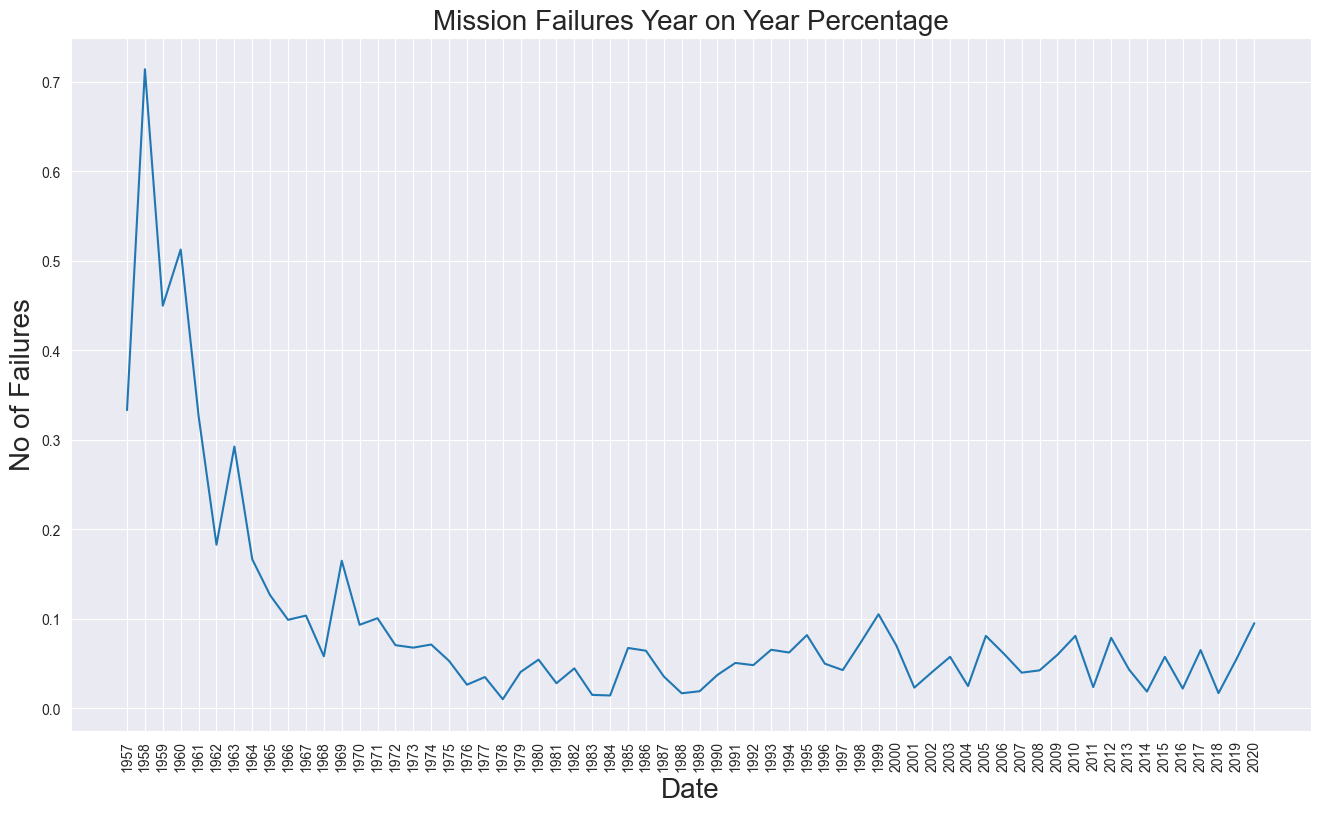

In [80]:
plt.figure(figsize=(16, 9))

plt.title('Mission Failures Year on Year Percentage', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Failures', fontsize=20)
plt.xticks(df_failures["Date"], rotation=90)

plt.plot(df_failures["Date"], df_failures["Failures_Percent"])

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [81]:
countries_launches_per_year = df_data.copy()[["ISO_code", "Date"]]
countries_launches_per_year["Date"] = countries_launches_per_year["Date"].dt.year

countries_launches_per_year

ISO_code  Date
0            USA  2020
1          China  2020
2            USA  2020
3     Kazakhstan  2020
4            USA  2020
...          ...   ...
4319         USA  1958
4320         USA  1958
4321         USA  1957
4322  Kazakhstan  1957
4323  Kazakhstan  1957

[4323 rows x 2 columns]

In [82]:
countries_launches_per_year = countries_launches_per_year.groupby(["ISO_code", "Date"]).agg(Total_Launches=("ISO_code", "count")).reset_index()

countries_launches_per_year

ISO_code  Date  Total_Launches
0    Australia  1967               1
1    Australia  1968               1
2    Australia  1969               1
3    Australia  1970               2
4    Australia  1971               1
..         ...   ...             ...
422        USA  2016              27
423        USA  2017              30
424        USA  2018              34
425        USA  2019              27
426        USA  2020              21

[427 rows x 3 columns]

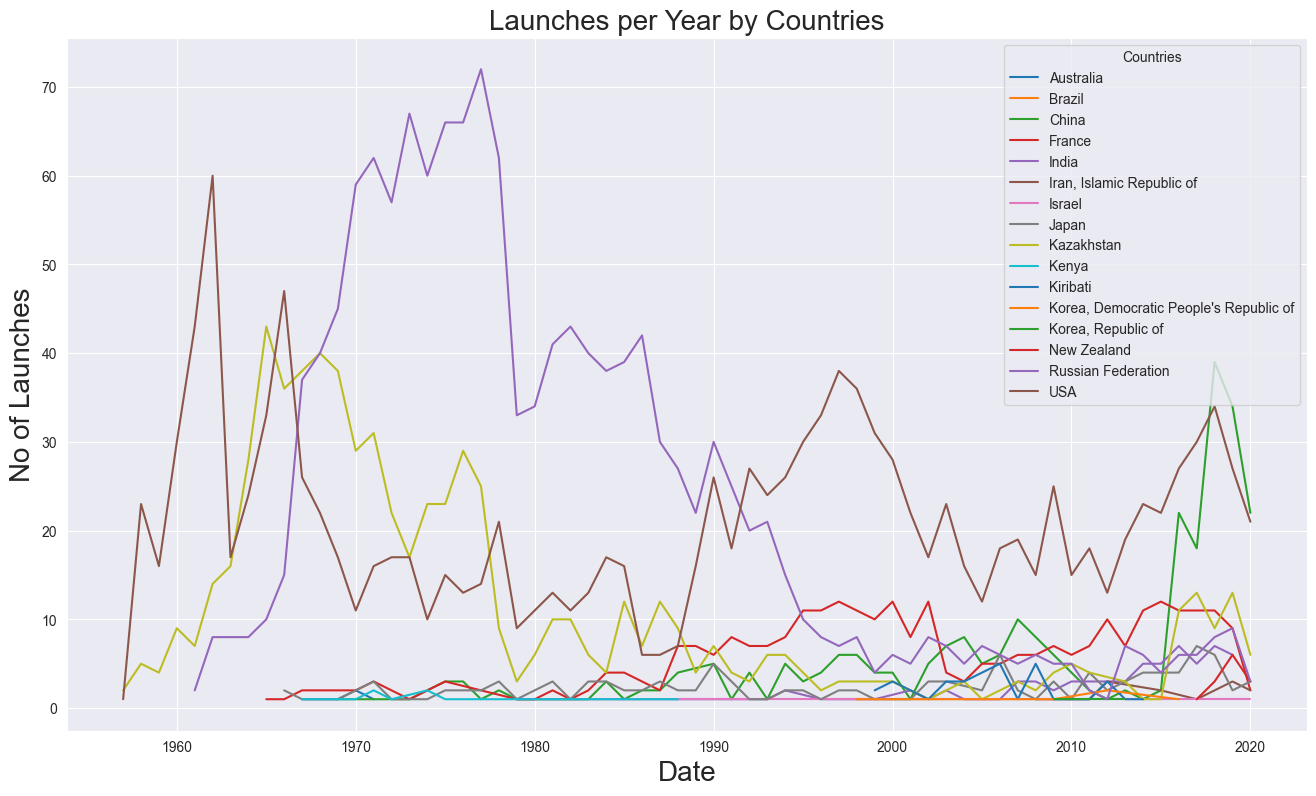

In [83]:
plt.figure(figsize=(16, 9))

plt.title('Launches per Year by Countries', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for country in countries_launches_per_year['ISO_code'].unique():
    country_data = countries_launches_per_year[countries_launches_per_year["ISO_code"] == country]
    plt.plot(country_data['Date'], country_data['Total_Launches'])

plt.legend(countries_launches_per_year["ISO_code"].unique(), title='Countries')

plt.show()

In [84]:
countries_launches_per_year_successful = df_data.copy()[["ISO_code", "Date", "Mission_Status"]]
countries_launches_per_year_successful["Date"] = countries_launches_per_year_successful["Date"].dt.year

countries_launches_per_year_successful = countries_launches_per_year_successful.query("Mission_Status == 'Success'")

countries_launches_per_year_successful

ISO_code  Date Mission_Status
0            USA  2020        Success
1          China  2020        Success
2            USA  2020        Success
3     Kazakhstan  2020        Success
4            USA  2020        Success
...          ...   ...            ...
4316         USA  1958        Success
4317         USA  1958        Success
4320         USA  1958        Success
4322  Kazakhstan  1957        Success
4323  Kazakhstan  1957        Success

[3878 rows x 3 columns]

In [85]:
countries_launches_per_year_successful = countries_launches_per_year_successful.groupby(["ISO_code", "Date"]).agg(Total_Launches=("ISO_code", "count")).reset_index()

countries_launches_per_year_successful

ISO_code  Date  Total_Launches
0    Australia  1967               1
1    Australia  1968               1
2    Australia  1971               1
3        China  1970               1
4        China  1971               1
..         ...   ...             ...
381        USA  2016              26
382        USA  2017              30
383        USA  2018              33
384        USA  2019              24
385        USA  2020              20

[386 rows x 3 columns]

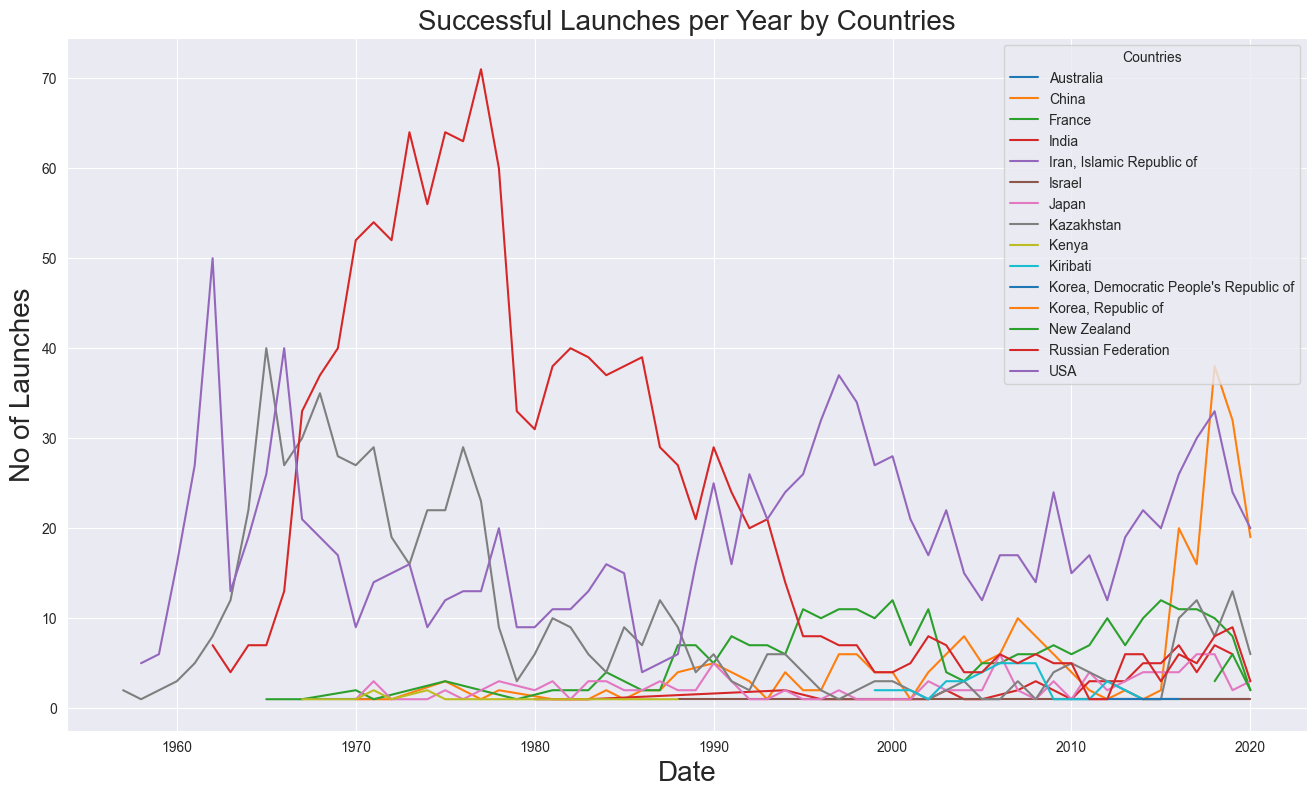

In [86]:
plt.figure(figsize=(16, 9))

plt.title('Successful Launches per Year by Countries', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for country in countries_launches_per_year_successful['ISO_code'].unique():
    country_data = countries_launches_per_year_successful[countries_launches_per_year_successful["ISO_code"] == country]
    plt.plot(country_data['Date'], country_data['Total_Launches'])

plt.legend(countries_launches_per_year_successful["ISO_code"].unique(), title='Countries')

plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [87]:
org_launches_per_year = df_data.copy()[["Organisation", "Date"]]
org_launches_per_year["Date"] = org_launches_per_year["Date"].dt.year

org_launches_per_year

Organisation  Date
0          SpaceX  2020
1            CASC  2020
2          SpaceX  2020
3       Roscosmos  2020
4             ULA  2020
...           ...   ...
4319      US Navy  1958
4320         AMBA  1958
4321      US Navy  1957
4322    RVSN USSR  1957
4323    RVSN USSR  1957

[4323 rows x 2 columns]

In [88]:
org_launches_per_year = org_launches_per_year.groupby(["Organisation", "Date"]).agg(Total_Launches=("Organisation", "count")).reset_index()

org_launches_per_year

Organisation  Date  Total_Launches
0             AEB  1997               1
1             AEB  1999               1
2             AEB  2003               1
3            AMBA  1958               7
4            AMBA  1967               1
..            ...   ...             ...
658        VKS RF  2020               3
659  Virgin Orbit  2020               1
660      Yuzhmash  1969               1
661      Yuzhmash  1991               1
662       i-Space  2019               1

[663 rows x 3 columns]

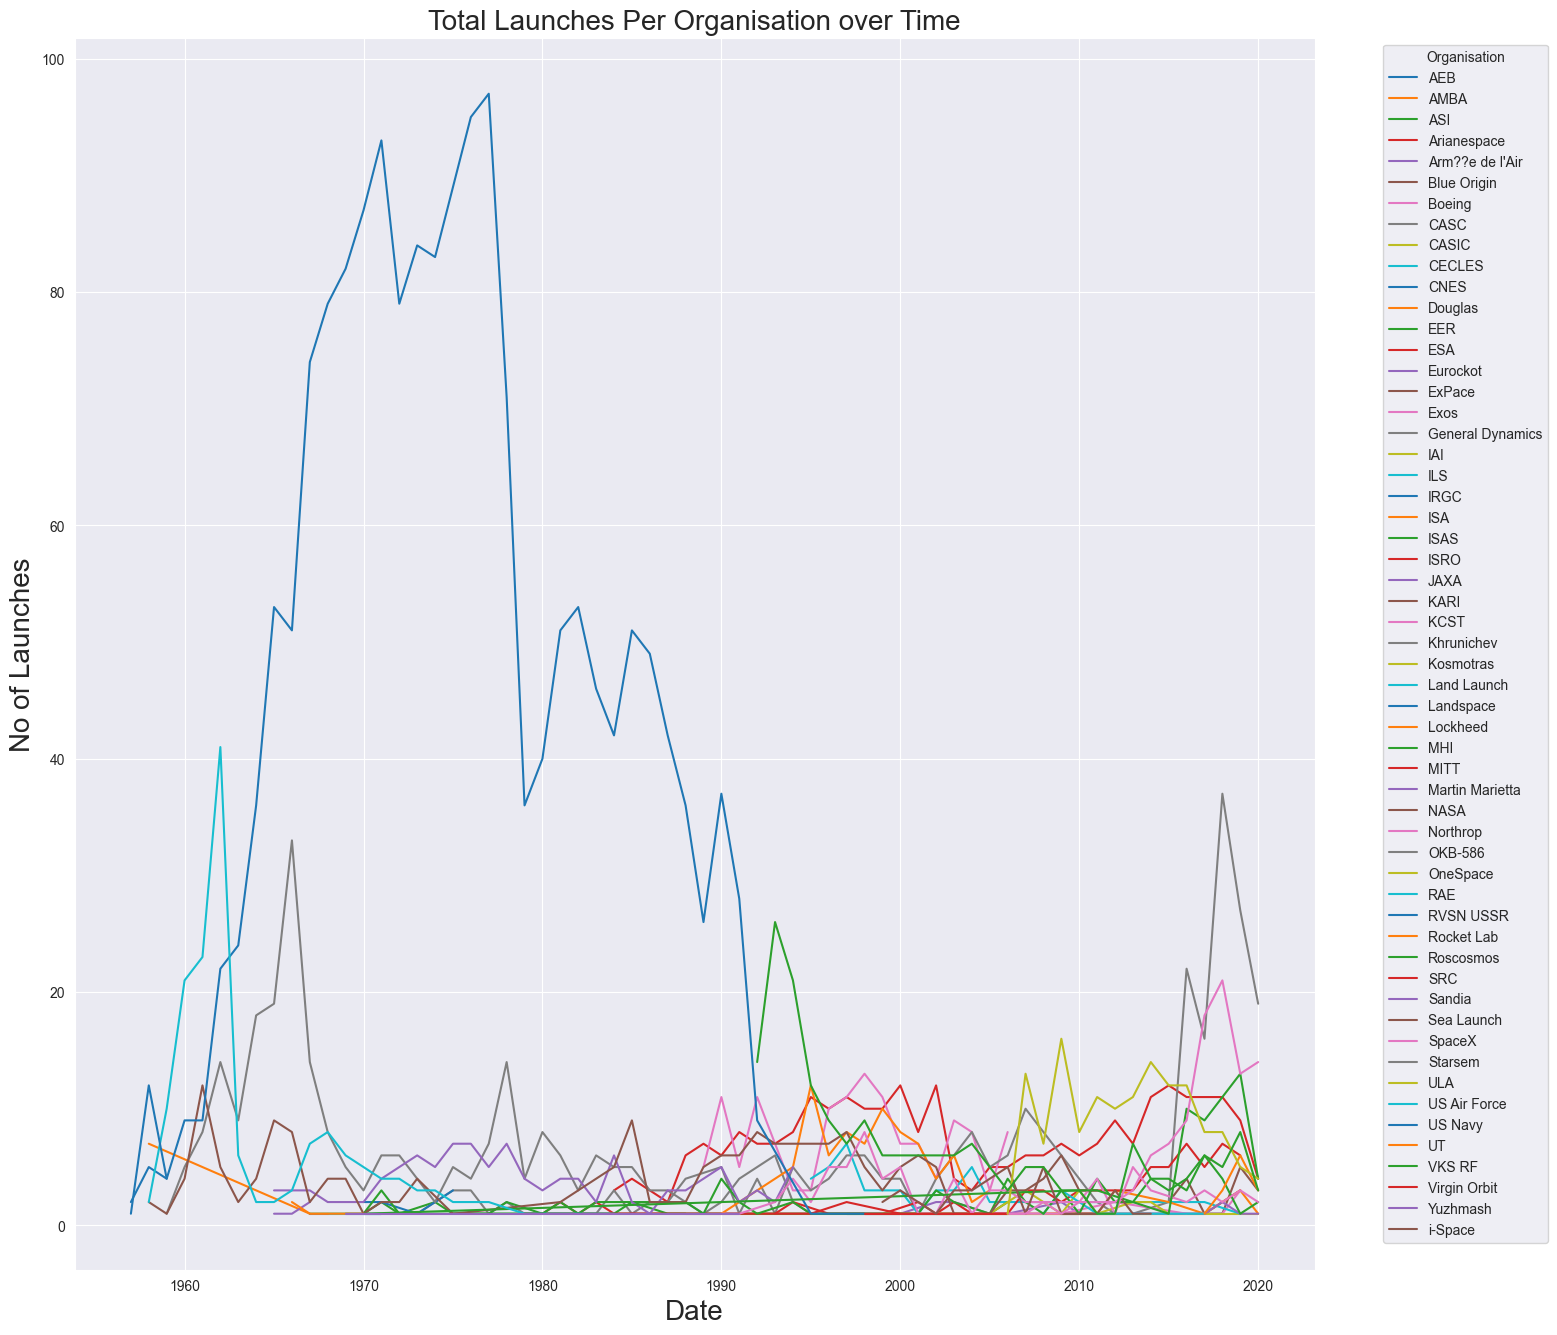

In [89]:
plt.figure(figsize=(16, 16))

plt.title('Total Launches Per Organisation over Time', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    plt.plot(org_data['Date'], org_data['Total_Launches'])

plt.legend(org_launches_per_year["Organisation"].unique(), title='Organisation', bbox_to_anchor=(1.05, 1))

plt.show()